In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ggplot import *
import pandas as pd
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix
import seaborn

In [2]:
train = pd.read_csv("Forest/train.csv")
test = pd.read_csv("Forest/test.csv")

In [3]:
xtrain = train.iloc[:, 1:-1]
ytrain = train.iloc[:, -1]

xtest = test.iloc[:, 1:]
ytest = test.iloc[:, -1]

# xtrain = pd.concat([xtrain, xtest])
# ytrain = pd.concat([ytrain,ytest])

xtrain.shape, xtest.shape
xtrain.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#xtrain['Elevation'] = xtrain.Elevation.map(lambda x: (x - xtrain.Elevation.min())/ (xtrain.Elevation.max() -xtrain.Elevation.min()))

for col in xtrain.columns[:10]:
    xtrain[col] = xtrain[col].map(lambda x: (x - xtrain[col].min())/ (xtrain[col].max() -xtrain[col].min()))

/home/mfc/.virtualenvs/dataMining/lib/python3.4/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [24]:
xtrain.to_csv("Forest/norm_data.csv")

In [42]:
trans_train = xtrain.copy()

trans_train['Horizontal_Distance_To_Roadways'] = np.log10(xtrain.Horizontal_Distance_To_Roadways.values)
trans_train['Horizontal_Distance_To_Hydrology'] = np.log10(xtrain.Horizontal_Distance_To_Hydrology.values)
trans_train['Hillshade_9am'] = np.log10(xtrain.Hillshade_9am.values)


trans_train['Horizontal_Distance_To_Roadways'] = (xtrain.Horizontal_Distance_To_Roadways.map(lambda x: 0 if np.isinf(x) else x))
trans_train['Horizontal_Distance_To_Hydrology'] = (xtrain.Horizontal_Distance_To_Hydrology.map(lambda x: 0 if np.isinf(x) else x))
trans_train['Hillshade_9am'] = (xtrain.Hillshade_9am.map(lambda x: 0 if np.isinf(x) else x))

In [ ]:
ucl_dat = pd.read_csv("Forest/covtype.data")
xtest = ucl_dat.iloc[:, :-1]
ytest = ucl_dat.iloc[:, -1]


# logistic regression

In [25]:
from LogisticRegression import  *

In [26]:
sgd(xtrain.values, ytrain.values, 54, 8,  learning_rate=0.1, n_epochs=1000, batch_size=150)

... building the model
... training the model
epoch 1, minibatch 20/20, validation error 70.666667 %
     epoch 1, minibatch 20/20, test error of best model 73.366667 %
epoch 2, minibatch 20/20, validation error 70.133333 %
     epoch 2, minibatch 20/20, test error of best model 69.744444 %
epoch 3, minibatch 20/20, validation error 65.966667 %
     epoch 3, minibatch 20/20, test error of best model 67.733333 %
epoch 4, minibatch 20/20, validation error 64.133333 %
     epoch 4, minibatch 20/20, test error of best model 67.466667 %
epoch 5, minibatch 20/20, validation error 60.900000 %
     epoch 5, minibatch 20/20, test error of best model 67.022222 %
epoch 6, minibatch 20/20, validation error 59.200000 %
     epoch 6, minibatch 20/20, test error of best model 66.366667 %
epoch 7, minibatch 20/20, validation error 56.766667 %
     epoch 7, minibatch 20/20, test error of best model 65.211111 %
epoch 8, minibatch 20/20, validation error 54.833333 %
     epoch 8, minibatch 20/20, test er

The code for file  ran for 7.6s


In [28]:
y_pred = predict(xtrain, ytrain)

TypeError: cannot do slice stop value indexing on <class 'pandas.core.index.Int64Index'> with these indexers [12096.0] of <class 'float'>

# PCA

In [93]:
from PCA import PCA

pca = PCA(xtrain.values)
pca_trans = PCA(trans_train.values)

sum(pca.summary(35))

0.98789763092952076

In [ ]:
X_new = pca.transform(3)

In [ ]:
indx1=np.array((ytrain==1),dtype=bool)
plt.scatter(X_new[indx1,0], X_new[indx1,1], c='r', alpha = .1)

In [ ]:
indx3=np.array((ytrain==3),dtype=bool)
plt.scatter(X_new[indx3,0], X_new[indx3,1], c='g', alpha = .1)

In [ ]:
indx4=np.array((ytrain==4),dtype=bool)
plt.scatter(X_new[indx4,0], X_new[indx4,1], c='y', alpha = .1)

In [ ]:
indx5=np.array((ytrain==5),dtype=bool)
plt.scatter(X_new[indx5,0], X_new[indx5,1], c='c', alpha = .1)

In [ ]:
indx6=np.array((ytrain==6),dtype=bool)
plt.scatter(X_new[indx6,0], X_new[indx6,1], c='black', alpha = .1)

In [ ]:
indx7=np.array((ytrain==7),dtype=bool)
plt.scatter(X_new[indx7,0], X_new[indx7,1], c='gray', alpha = .1)

In [75]:
X3 = pca.transform(3)
X2 = pca.transform(2)

In [ ]:
import seaborn
fig = plt.figure()

fig.set_size_inches(15, 12)
ax = fig.add_subplot(111, projection='3d')


indx1=np.array((ytrain==1),dtype=bool)
ax.scatter(X3[indx1,0],X3[indx1,1], X3[indx1,2], color='r',s = 70, alpha = 0.1, label="1")

indx2=np.array((ytrain==2),dtype=bool)
ax.scatter(X3[indx2,0],X3[indx2,1], X3[indx2,2], color='b', alpha = 0.1, label="2")

indx3=np.array((ytrain==3),dtype=bool)
ax.scatter(X3[indx3,0],X3[indx3,1], X3[indx3,2], color='m', alpha = 0.1, label="3")

indx4=np.array((ytrain==4),dtype=bool)
ax.scatter(X3[indx4,0],X3[indx4,1], X3[indx4,2], color='y', alpha = 0.1, label="4")

indx5=np.array((ytrain==5),dtype=bool)
ax.scatter(X3[indx5,0],X3[indx5,1], X3[indx5,2], color='pink', alpha = 0.1, label="5")


indx6=np.array((ytrain==6),dtype=bool)
ax.scatter(X3[indx6,0],X3[indx6,1], X3[indx6,2], color='gray', alpha = 0.1, label="6")

indx7=np.array((ytrain==7),dtype=bool)
ax.scatter(X3[indx7,0],X3[indx7,1], X3[indx7,2], color='orange', alpha = 0.1, label="7")

ax.view_init(20,15)
ax.legend()

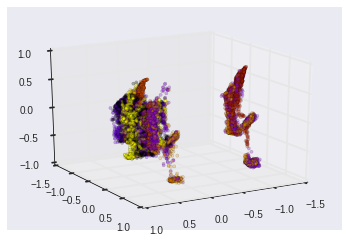

In [77]:
#import seaborn
import seaborn
fig = plt.figure()

fig.set_size_inches(6, 4)
ax = fig.add_subplot(111, projection='3d')

indx1=np.array((ytrain==1),dtype=bool)

ax.scatter(X3[:,0],X3[:,1],X3[:,2], c=ytrain ,s = 10, alpha = 0.3,cmap=plt.cm.gnuplot)
ax.view_init(20,60)


#plt.show()
plt.savefig("../project1/notebook/X3dim.png")

In [ ]:
X3

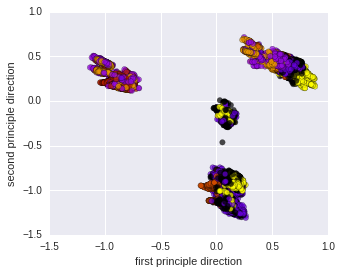

In [78]:
plt.figure(figsize=(5,4))
plt.scatter(X2[:,0],X2[:,1], c=ytrain ,s = 30, alpha = 0.7,cmap=plt.cm.gnuplot)
plt.xlabel("first principle direction")
plt.ylabel("second principle direction")

plt.savefig("../project1/notebook/X2dim.png")

# logistic regression after PCA

In [95]:
X5 = pca_trans.transform(30)
sgd(X5, ytrain.values, 30, 8,  learning_rate=0.35, n_epochs=20000, batch_size=150)

... building the model
... training the model
epoch 1, minibatch 20/20, validation error 60.466667 %
     epoch 1, minibatch 20/20, test error of best model 66.955556 %
epoch 2, minibatch 20/20, validation error 55.700000 %
     epoch 2, minibatch 20/20, test error of best model 64.355556 %
epoch 3, minibatch 20/20, validation error 50.133333 %
     epoch 3, minibatch 20/20, test error of best model 59.055556 %
epoch 4, minibatch 20/20, validation error 44.700000 %
     epoch 4, minibatch 20/20, test error of best model 55.111111 %
epoch 5, minibatch 20/20, validation error 42.666667 %
     epoch 5, minibatch 20/20, test error of best model 53.677778 %
epoch 6, minibatch 20/20, validation error 41.433333 %
     epoch 6, minibatch 20/20, test error of best model 52.955556 %
epoch 7, minibatch 20/20, validation error 40.500000 %
     epoch 7, minibatch 20/20, test error of best model 52.600000 %
epoch 8, minibatch 20/20, validation error 40.433333 %
     epoch 8, minibatch 20/20, test er

The code for file  ran for 5.5s


# LDA

In [30]:
from LDA import  DA


In [31]:
sample = 10000
lda = DA(xtrain.values[:sample,], ytrain.values[:sample,], mode="LDA")
lda.fit()

In [32]:
yhat, error = lda.predict(xtrain.values[:sample,], ytrain.values[:sample,])
print("error: ", error)


error:  0.8625


In [33]:
yhat, error = lda.predict(xtrain.values[sample:,], ytrain.values[sample:,])
print("error: ", error)

error:  0.8466796875


# LDA with PCA

In [71]:
lda = DA(X5[:10000,], ytrain.values[:10000,], mode="LDA")
lda.fit()
yhat, error = lda.predict(X5[:10000,], ytrain.values[:10000,])
print("error: ", error)

error:  0.476


In [74]:
yhat, error = lda.predict(X5[10000:,], ytrain.values[10000:,])
print("error: ", error)

error:  0.5439453125


# QDA

In [ ]:
sample = 10000
qda = DA(xtrain.values[:sample,:10], ytrain.values[:sample], mode="QDA")
qda.fit()


In [ ]:
yhat, error = qda.predict(xtrain.values[:sample,:10], ytrain.values[:sample])
print("error: ", error)